# XAIoGraphs


* XAIoGraphs (e**X**plainability **A**rticicial **I**ntelligence **o**ver **Graphs**) is an Explicability and Fairness 
Python library for classification problems with tabulated and discretized data.



* This library offers the following functionalities:

    + **Global Explainability**: explains the results of the model as a whole, selecting the variables that have the greatest impact on the model.
    + **Local Explainability**: explains the prediction of a single element.
    + **Reliability Measure** of local explainability.
    + **Resaon Why:** *explanation in natural language* of the classification of each element.
    + **Fairness Scoring**: identifies possible discriminations in the classifications made on certain sensitive variables.


* To ***interpret the explanations*** we have ***XAIoWeb***, which is a ***web interface*** executed in local mode (127.0.0.1:8080), which shows the results of the explanations in 3 sections: Global, Local and Fairness:


<hr>

## 🔨 Installation XAIoGraphs

Create a virtual environment using conda for easier management of dependencies and packages. 
For installing conda, follow the instructions on the [official conda website](https://docs.conda.io/projects/conda/en/latest/user-guide/install/)

```python
conda create --name xaio_env python=3.7
conda activate xaio_env
```

⚠️ We recommend using Python 3.7 or above.


**Desde el Artifactory** - Tener VPN Activada
```python
pip install http://artifactory.hi.inet:80/artifactory/iuc-4pl/com/telefonica/xaiographs/XAIoGraphs-0.0.1-py3-none-any.whl
```


In [1]:
# Instalar XAIoGraphs: Descomentar siguiente linea
#! pip install http://artifactory.hi.inet:80/artifactory/iuc-4pl/com/telefonica/xaiographs/XAIoGraphs-0.0.1-py3-none-any.whl
        

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 50.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.2/33.2 MB 27.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 52.0 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
  Attempting uninstall: scikit-learn
    Found 

<hr>


# 1.- Datos


* **XAIoGraphs explica** los resultados de la **clasificación** de un modelo, metamodelo o realidad a partir de un **dataset tabular y con las variables discretizadas**.

    + A nivel de *Explicabilidad Local*, explica para cada elemento la importancia que tiene la "variable-valor" (valor discretizado de la variable) en la decisión de la clasificación realizada por el modelo.
    + A nivel de *Explicabilidad Global*, agrega todas (o un conjunto relevante) de explicabilidades locales y obtiene:
        - Importancia Global de las variables
        - Importancia Global por target de las variables
        - Importancia Global por target de los pares "variable-valor"


* La discretización de las variables se puede hacer de manera automática utilizando algún algoritmo de discretización (p.e-> KBinsDiscretizer de scikit-learn) o discretizándolas con algún criterio (lógica, negocio, naturaleza de los datos, etc.). Dado que **XAIoGraphs explica la importancia que tienen los valores discretizados** de cada variable, es muy importante entender los pros y contras de la discretización:
    1. Si **discretizamos** una variable de manera automática y con **"muchos" niveles**, la **explicabilidad** será **más precisa** pero (seguramente) será **menos interpretable** (por un humano)
    2. Si **discretizamos** una variable con algún criterio lógico y con **"pocos" niveles**, la **explicabilidad** será **menos precisa** pero (es más probable) que sea **más interpretable**.
    
    
* Veamos a continuación un ejemplo con el dataset del titanic y la distribución de sus variables:

In [2]:
# XAIoGraphs proporciona el dataset del titanic "limpio"
from xaiographs.datasets import load_titanic

df_titanic = load_titanic()
df_titanic.head(5)

,id,gender,title,age,family_size,is_alone,embarked,class,ticket_price,survived
0,0,female,Mrs,29.0000,0,1,S,1,211.3375,1
1,1,male,Mr,0.9167,3,0,S,1,151.5500,1
2,2,female,Mrs,2.0000,3,0,S,1,151.5500,0
3,3,male,Mr,30.0000,3,0,S,1,151.5500,0
4,4,female,Mrs,25.0000,3,0,S,1,151.5500,0


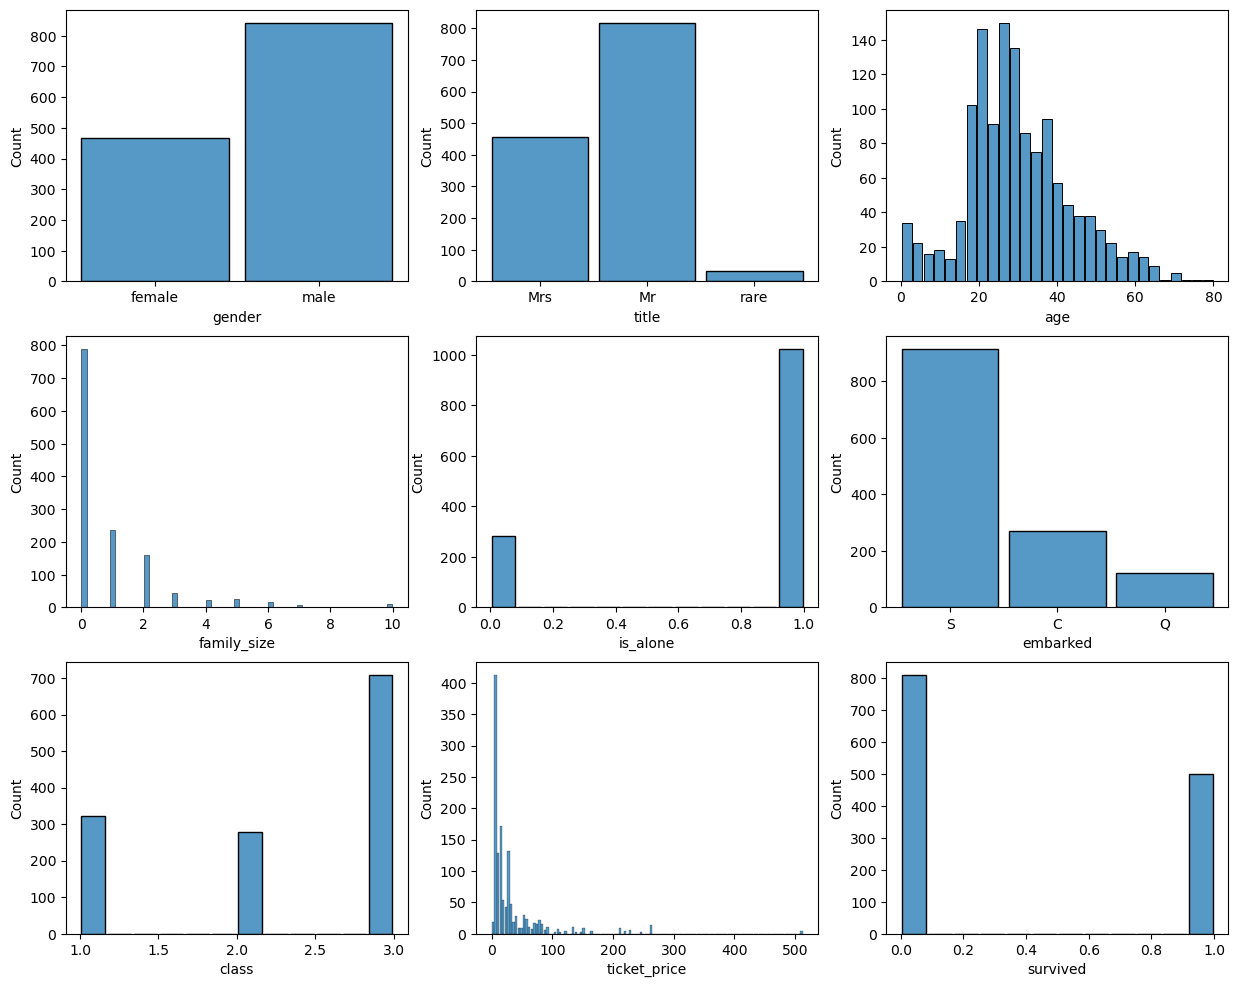

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15, 12))
pos = 1
for col in df_titanic.drop('id', axis=1).columns:
    plt.subplot(3, 3, pos)
    sns.histplot(data=df_titanic, x=col, shrink=.9)
    pos += 1
plt.show()

* A excepción del Target (columna survived), el resto de columnas deben de estar discretizadas para que XAIoGraphs pueda calcular las explicaciones. Se realizan las siguientes discretizaciones.
    + gender: ya discretizado {male, female}
    + title: ya discretizado {Mr, Mrs, rare}
    + age: discretizado de la siguiente manera: {<12_years, 12_18_years, 18_30_years, 30_60_years, >60_years}
    + family_size: discretizado de la siguiente manera: {1: viaja solo, 2: pareja, 3-5: familias de 3 a 5 miembros, >5: familias de más de 5 miembros}
    + is_alone: ya discretizado {0: viaja solo, 1: viaja en familia}
    + embarked: ya discretizado {C, S, Q}
    + class: ya discretizado {1, 2, 3}
    + ticket_price: discretización en 3 buckets {High: precio alto, Mid: precio medio, Low: precio bajo}



* XAIoGraphs ya proporciona esta dataset discretizado con los criterios antes mencionados:

In [4]:
from xaiographs.datasets import load_titanic_discretized

df_titanic, feature_cols, target_cols, y_true, y_predict = load_titanic_discretized()
df_titanic[feature_cols].sample(10)

,gender,title,age,family_size,is_alone,embarked,class,ticket_price
324,female,Mrs,18_30_years,1,1,C,2,Mid
1031,male,Mr,30_60_years,1,1,S,3,Low
980,female,Mrs,18_30_years,1,1,S,3,Low
869,male,Mr,18_30_years,1,1,S,3,Mid
212,male,Mr,30_60_years,1,1,C,1,High
468,female,Mrs,18_30_years,1,1,S,2,Mid
1190,male,Mr,18_30_years,1,1,S,3,Mid
494,female,Mrs,18_30_years,2,0,C,2,High
1288,male,Mr,12_18_years,1,1,S,3,Low
152,male,Mr,30_60_years,1,1,S,1,High


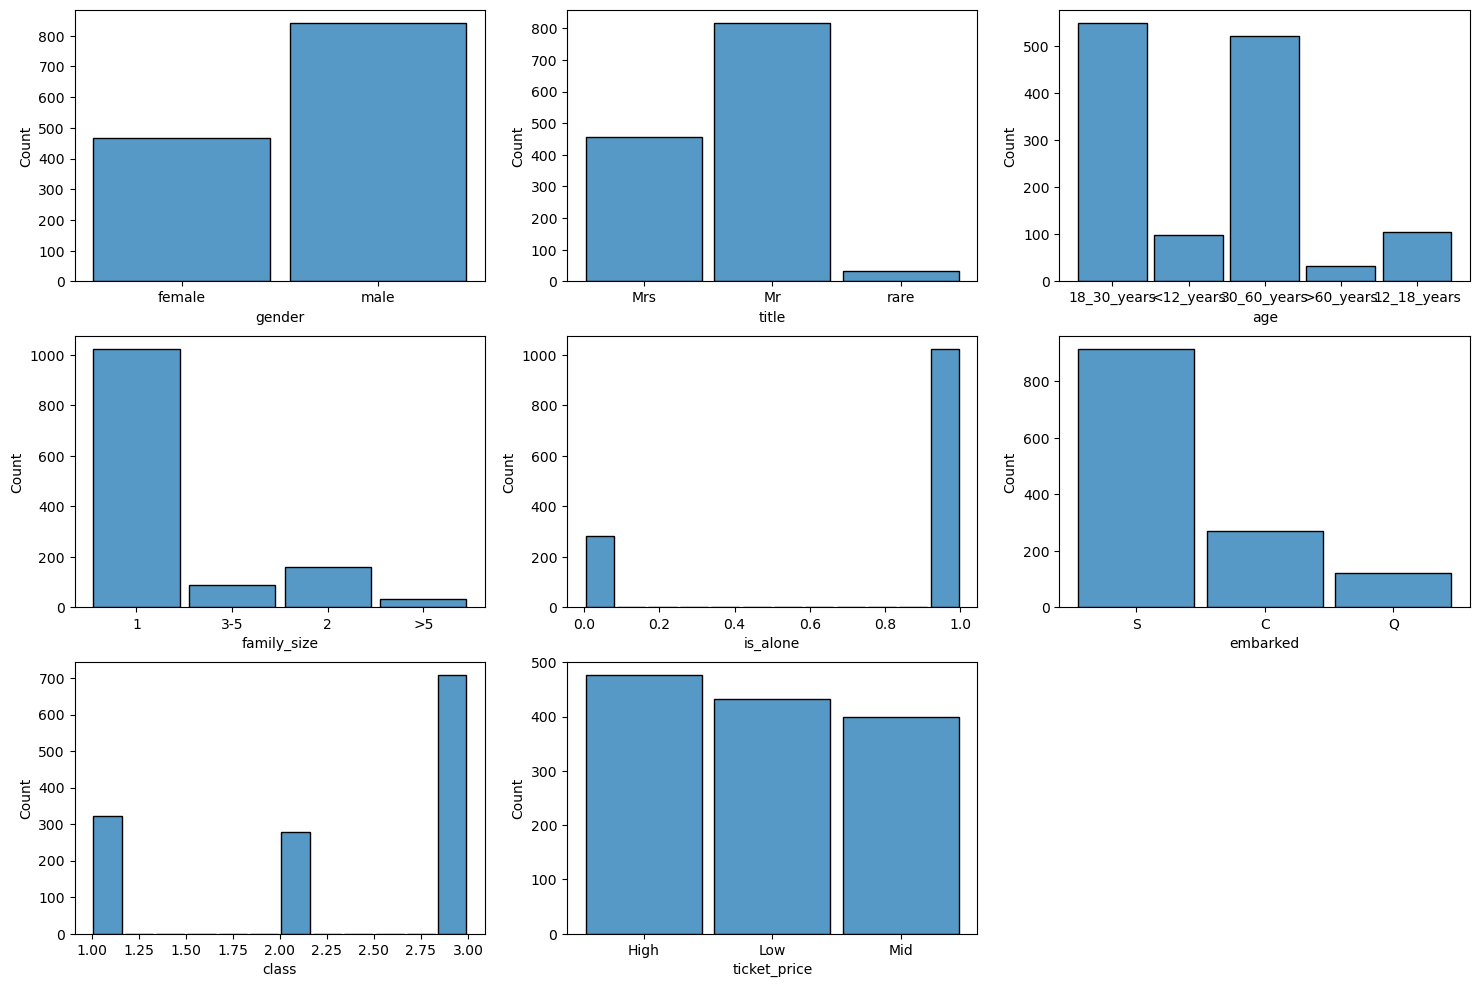

In [5]:
plt.figure(figsize=(18, 12))
pos = 1
for col in feature_cols:
    plt.subplot(3, 3, pos)
    sns.histplot(data=df_titanic, x=col, shrink=.9)
    pos += 1
plt.show()

<hr>

## 2.- Target (Probabilidades)

* Para que XAIoGraphs proporcione las explicabilidades necesita saber cual es la probabilidad de que un elemento sea clasificado en cada una de las clases. Para se necesita un dataframe que contenga tantas columnas como features tengan los elementos y otras tantas columnas como target a clasificar haya con el valor de la probabilidad de que ese elemento pertenezca a una determinada clase. En caso de que sea una clasificación discriminativa (probabilidad = 1 ó probabilidad = 0) también es necesario tener las columnas del target con su probabilidad.


* Veamos a continuación un ejemplo de como quedaría el dataframe para que XAIoGraphs pueda calcular la explicabilidad, siendo las columnas (SURVIVED y NO_SURVIVED) la probabilidad de clasificación a cada uno de los targets:


In [6]:
from xaiographs.datasets import load_titanic_discretized

df_titanic, feature_cols, target_cols, y_true, y_predict = load_titanic_discretized()
df_titanic[feature_cols + target_cols].sample(10)

,gender,title,age,family_size,is_alone,embarked,class,ticket_price,SURVIVED,NO_SURVIVED
831,male,Mr,30_60_years,>5,0,S,3,High,0,1
339,male,Mr,<12_years,3-5,0,S,2,High,1,0
643,female,Mrs,<12_years,>5,0,S,3,High,1,0
964,male,Mr,30_60_years,1,1,S,3,Mid,0,1
1037,female,Mrs,18_30_years,1,1,C,3,Low,1,0
930,male,Mr,30_60_years,1,1,Q,3,Low,0,1
715,male,Mr,18_30_years,1,1,S,3,Low,0,1
331,male,Mr,12_18_years,1,1,S,2,Mid,0,1
1177,male,Mr,30_60_years,>5,0,S,3,High,0,1
0,female,Mrs,18_30_years,1,1,S,1,High,1,0


<hr>

## 3.- Explicabilidad


* Para que XAIoGraphs calcule la explicabilidad se necesita:
    1. ***Pandas DataFrame con el dataset*** con las variables discretizadas y las columnas con la probabilidad de clasificación a cada uno de los targets.
    2. Instanciar un ***objeto de la clase "Explainer"*** al que se le pasan como parámetros:
        - dataset: Variables discretizadas + Probabilidad de los targets
        - importance_engine: algoritmo de explicabilidad (TEF_SHAP)
        - verbose: 0:para que no imprima nada por pantalla, 1: para que imprima por pantalla el proceso
        
    3. Cálculo de las explicabilidades llamando al ***método .fit()*** al que se le pasan como parámetros:
        - feature_cols: columnas del dataframe con las fetures
        - target_cols: columnas del dataframe con las probabilidades de los targets

In [7]:
from xaiographs import Explainer

# LOAD DATASETS
df_titanic, feature_cols, target_cols, y_true, y_predict = load_titanic_discretized()

# EXPLAINER
explainer = Explainer(dataset=df_titanic, importance_engine='TEF_SHAP', verbose=1)
explainer.fit(feature_cols=feature_cols, target_cols=target_cols)

INFO: Instantiating FeatureSelector to select the top 8 features:
INFO:     FeatureSelector top 8 features selected: ['gender', 'title', 'class', 'ticket_price', 'embarked', 'family_size', 'is_alone', 'age']
INFO:     FeatureSelector global feature rank: ['gender', 'title', 'class', 'ticket_price', 'embarked', 'family_size', 'is_alone', 'age']
INFO:     FeatureSelector feature rank by target: {'SURVIVED': [('gender', 0.2625072121063008), ('title', 0.24117204358437364), ('class', 0.12842999966649565), ('ticket_price', 0.11780865681881485), ('embarked', 0.07662209494574886), ('family_size', 0.0691949987988183), ('is_alone', 0.053045057108291355), ('age', 0.05121993697115665)]}
INFO: TEF_SHAP importance calculator will be instantiated
INFO:     Instantiating ImportanceCalculator:
INFO:          the whole dataset will be used to train
INFO:          sampling the dataset to be globally explained: 50000 samples will be used ...
WARN:               requested number of samples for global expla

Explanation: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 172.06it/s]


INFO:     ImportanceCalculator: Number of detected discrepancies (original model prediction != SHAP prediction) for target SURVIVED in the aggregated dataset: 0
INFO:     ImportanceCalculator: Number of detected discrepancies (original model prediction != SHAP prediction) for target NO_SURVIVED in the aggregated dataset: 0
INFO:     ImportanceCalculator: Number of detected discrepancies (original model prediction != SHAP prediction) for target SURVIVED in the original dataset: 0
INFO:     ImportanceCalculator: Number of detected discrepancies (original model prediction != SHAP prediction) for target NO_SURVIVED in the original dataset: 0
INFO:     Sampling the dataset to be locally explained: 100 samples will be used ...
INFO: Instantiating StatsCalculator:
INFO:     StatsCalculator: calculating edges stats ...
INFO:     StatsCalculator: calculating nodes stats ...
INFO: Instantiating Exporter:
INFO:     Exporting data to ./xaioweb_files


* Para acceder a los resultados de la explicabilidad, se accede mediante llamadas a "properties" que devuelven un dataframe con la información. Veamos a continuación como obtenemos los diferentes resultados:


#### Explicabilidad Global

* Importancia de las variables a nivel global

In [8]:
explainer.global_explainability

,feature,importance,rank
0,gender,0.124936,1
1,title,0.122790,2
2,class,0.089931,3
3,ticket_price,0.062145,4
7,age,0.059930,5
4,embarked,0.059490,6
5,family_size,0.042980,7
6,is_alone,0.031692,8


#### Explicabilidad Global por Target

* Importancia de las variables por target a nivel global

In [9]:
explainer.global_target_explainability

,target,feature,importance,rank
0,NO_SURVIVED,gender,0.108512,1
1,NO_SURVIVED,title,0.107290,2
2,NO_SURVIVED,class,0.074033,3
3,NO_SURVIVED,ticket_price,0.056893,4
7,NO_SURVIVED,age,0.052081,5
4,NO_SURVIVED,embarked,0.050245,6
5,NO_SURVIVED,family_size,0.037737,7
6,NO_SURVIVED,is_alone,0.027281,8
8,SURVIVED,gender,0.151681,1
9,SURVIVED,title,0.148033,2


#### Explicabilidad Global por "Variable-Valor" y Target


In [10]:
explainer.global_target_feature_value_explainability

,target,feature_value,importance,rank
28,NO_SURVIVED,family_size_>5,0.190344,1
8,NO_SURVIVED,age_>60_years,0.189757,2
32,NO_SURVIVED,gender_male,0.109828,3
44,NO_SURVIVED,title_Mr,0.109525,4
30,NO_SURVIVED,gender_female,0.100472,5
46,NO_SURVIVED,title_Mrs,0.099421,6
6,NO_SURVIVED,age_<12_years,0.090704,7
14,NO_SURVIVED,class_3,0.083974,8
40,NO_SURVIVED,ticket_price_Low,0.076323,9
48,NO_SURVIVED,title_rare,0.074205,10


#### Explicabilidad Local 

In [11]:
explainer.local_feature_value_explainability

,id,feature_value,importance,rank
0,0,gender_female,0.191029,1
1,0,title_Mrs,0.189320,2
2,0,class_1,0.147101,3
3,0,ticket_price_High,0.101550,4
4,0,embarked_S,-0.027895,8
...,...,...,...,...
10467,1308,ticket_price_Low,0.065827,3
10468,1308,embarked_S,0.034272,5
10469,1308,family_size_1,0.020183,7
10470,1308,is_alone_1,0.020183,7


In [12]:
df_local = explainer.local_feature_value_explainability
df_local[df_local['id'] == 0].sort_values('rank')

,id,feature_value,importance,rank
0,0,gender_female,0.191029,1
1,0,title_Mrs,0.189320,2
2,0,class_1,0.147101,3
3,0,ticket_price_High,0.101550,4
7,0,age_18_30_years,0.008612,5
5,0,family_size_1,0.004920,6
6,0,is_alone_1,0.004920,6
4,0,embarked_S,-0.027895,8


#### Medida de fiabilidad de cada explicación local

In [13]:
explainer.local_dataset_reliability.head(10)

,id,target,reliability
0,0,SURVIVED,1.00
1,1,SURVIVED,1.00
2,2,NO_SURVIVED,1.00
3,3,NO_SURVIVED,1.00
4,4,NO_SURVIVED,0.20
5,5,SURVIVED,0.28
6,6,SURVIVED,0.75
7,7,NO_SURVIVED,0.86
8,8,SURVIVED,1.00
9,9,NO_SURVIVED,1.00


#### Información adicional

* Frecuencia de los valores en el dataset

In [14]:
explainer.global_frequency_feature_value.sort_values('frequency', ascending=False)

,feature_value,frequency
36,is_alone_1,1025
22,family_size_1,1025
20,embarked_S,916
32,gender_male,843
44,title_Mr,818
14,class_3,709
2,age_18_30_years,551
4,age_30_60_years,522
38,ticket_price_High,477
30,gender_female,466


<hr>

# Ejecución de un ejemplo completo de XAIoGraphs:

## 📝 Start with your first example

* With the virtual environment enabled, you can run the following entry point to see a sample run:

```python
titanic_example
```

* Or if you prefer, you can execute the following code to see a complete execution of all the XAIoGraphs functionalities:

In [15]:
from xaiographs import Explainer
from xaiographs import Why
from xaiographs import Fairness
from xaiographs.datasets import load_titanic_discretized, load_titanic_why

LANG = 'en'

# LOAD DATASETS & SEMANTICS
df_titanic, feature_cols, target_cols, y_true, y_predict = load_titanic_discretized()
df_global_semantics, df_target_semantics, df_why_templates = load_titanic_why(language=LANG)

# EXPLAINER
explainer = Explainer(dataset=df_titanic, importance_engine='TEF_SHAP', verbose=1)
explainer.fit(feature_cols=feature_cols, target_cols=target_cols)

# WHY
why = Why(language=LANG,
          local_reliability=explainer.local_dataset_reliability,
          local_feat_val_expl=explainer.local_feature_value_explainability,
          why_elements=df_global_semantics,
          why_templates=df_why_templates,
          why_target=df_target_semantics,
          sample_ids_to_export=explainer.sample_ids_to_display,
          verbose=1)
why.fit()

# FAIRNESS
f = Fairness(verbose=1)
f.fit(df=df_titanic[feature_cols + [y_true] + [y_predict]],
      sensitive_cols=['gender', 'class', 'age'],
      target_col=y_true,
      predict_col=y_predict)

INFO: Instantiating FeatureSelector to select the top 8 features:
INFO:     FeatureSelector top 8 features selected: ['gender', 'title', 'class', 'ticket_price', 'embarked', 'family_size', 'is_alone', 'age']
INFO:     FeatureSelector global feature rank: ['gender', 'title', 'class', 'ticket_price', 'embarked', 'family_size', 'is_alone', 'age']
INFO:     FeatureSelector feature rank by target: {'SURVIVED': [('gender', 0.2625072121063008), ('title', 0.24117204358437364), ('class', 0.12842999966649565), ('ticket_price', 0.11780865681881485), ('embarked', 0.07662209494574886), ('family_size', 0.0691949987988183), ('is_alone', 0.053045057108291355), ('age', 0.05121993697115665)]}
INFO: TEF_SHAP importance calculator will be instantiated
INFO:     Instantiating ImportanceCalculator:
INFO:          the whole dataset will be used to train
INFO:          sampling the dataset to be globally explained: 50000 samples will be used ...
WARN:               requested number of samples for global expla

Explanation: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 175.28it/s]


INFO:     ImportanceCalculator: Number of detected discrepancies (original model prediction != SHAP prediction) for target SURVIVED in the aggregated dataset: 0
INFO:     ImportanceCalculator: Number of detected discrepancies (original model prediction != SHAP prediction) for target NO_SURVIVED in the aggregated dataset: 0
INFO:     ImportanceCalculator: Number of detected discrepancies (original model prediction != SHAP prediction) for target SURVIVED in the original dataset: 0
INFO:     ImportanceCalculator: Number of detected discrepancies (original model prediction != SHAP prediction) for target NO_SURVIVED in the original dataset: 0
INFO:     Sampling the dataset to be locally explained: 100 samples will be used ...
INFO: Instantiating StatsCalculator:
INFO:     StatsCalculator: calculating edges stats ...
INFO:     StatsCalculator: calculating nodes stats ...
INFO: Instantiating Exporter:
INFO:     Exporting data to ./xaioweb_files
INFO: Instantiating Why. Language has been set t

Checking "ticket_price" column: 100%|███████████████████████████████████████████████████| 8/8 [00:00<00:00, 1348.65it/s]


There are no correlated variables above the 0.9 threshold


Processing: sensitive_col=gender, sensitive_value=female, target_label=SURVIVED :   0%|           | 0/2 [00:00<?, ?it/s]
Processing: sensitive_col=gender, sensitive_value=female, target_label=NO_SURVIVED :   0%|        | 0/2 [00:00<?, ?it/s]
Processing: sensitive_col=class, sensitive_value=3, target_label=SURVIVED : 100%|█████████| 3/3 [00:00<00:00, 98.56it/s]
Processing: sensitive_col=class, sensitive_value=3, target_label=NO_SURVIVED : 100%|██████| 3/3 [00:00<00:00, 95.36it/s]
Processing: sensitive_col=age, sensitive_value=12_18_years, target_label=SURVIVED : 100%|█| 5/5 [00:00<00:00, 91.41it/s]
Processing: sensitive_col=age, sensitive_value=12_18_years, target_label=NO_SURVIVED : 100%|█| 5/5 [00:00<00:00, 101.17i
Processing Global Score "age" Feature: 100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 418.58it/s]


* After execution, a folder called "xaioweb_files" is created that contains a series of .json files to display the results in the XAIoWeb graphical interface.



## 📊 Launching XAIoWeb

* XAIoWeb is a web interface executed in local mode, which shows the results of the explanations in 3 sections: Global, Local and Fairness. To run the web (with the virtual environment activated), you must execute the following entry point:


```python
xaioweb -d xaioweb_files -o
```

* This entry point takes the following parameters:

    - `-d` o `--data` [REQUIRED]: JSON files path
    - `-p` o `--port` [OPTIONAL]: Web server port. 8080 by default
    - `-o` o `--open` [OPTIONAL]: Open web in browser

In [16]:
!xaioweb -d xaioweb_files -o

╔══════════════════════════════════════════════════╦════════════════════╗
║ XAIoWeb distribution                             ║ AVAILABLE          ║
╚══════════════════════════════════════════════════╩════════════════════╝
╔══════════════════════════════════════════════════╦════════════════════╗
║ global_explainability.json                       ║ AVAILABLE          ║
╠══════════════════════════════════════════════════╬════════════════════╣
║ global_target_distribution.json                  ║ AVAILABLE          ║
╠══════════════════════════════════════════════════╬════════════════════╣
║ global_graph_description.json                    ║ AVAILABLE          ║
╠══════════════════════════════════════════════════╬════════════════════╣
║ global_graph_nodes.json                          ║ AVAILABLE          ║
╠══════════════════════════════════════════════════╬════════════════════╣
║ global_graph_edges.json                          ║ AVAILABLE          ║
╠═════════════════════════════════════